In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sps_param_train = np.load("training_data/sps_parameters_150600000.npy")

In [3]:
photo_train = np.load("training_data/photometry_150600000.npy")

Text(0, 0.5, 'mass')

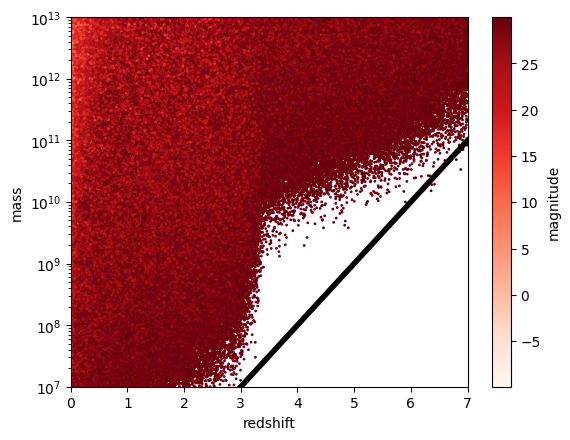

In [4]:
band = 0
nsamples = 10000000

def cut(z):
    return 10**(z+4)

zz = np.linspace(0, 7, 100)
mm = cut(zz)
plt.plot(zz, mm, lw=4, c='k')
plt.ylim(1e7, 1e13)
plt.xlim(0, 7)

z_train = sps_param_train[:nsamples, 0]
mass_train = sps_param_train[:nsamples, -1]
mag = photo_train[:nsamples, band]

inds = np.where(mass_train > cut(z_train))[0]
inds_mag = np.where(mag < 30)[0]

plt.scatter(z_train[inds_mag], mass_train[inds_mag], c=mag[inds_mag], cmap='Reds', s=1)
plt.yscale('log')
plt.colorbar(label='magnitude')

plt.xlabel('redshift')
plt.ylabel('mass')

Text(0, 0.5, 'mass')

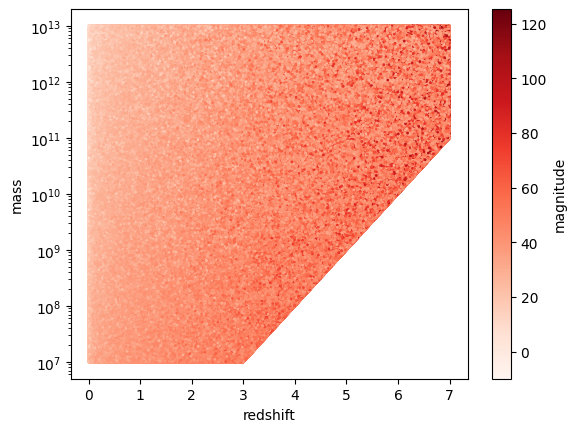

In [5]:
plt.scatter(z_train[inds], mass_train[inds], c=mag[inds], cmap='Reds', s=1)
plt.yscale('log')
plt.colorbar(label='magnitude')

plt.xlabel('redshift')
plt.ylabel('mass')

In [6]:
band = 0

z = sps_param_train[:, 0]
mass = sps_param_train[:, -1]
mag = photo_train[:, band]

inds = np.where(mass > cut(z))[0]

In [7]:
len(inds)

121913855

In [8]:
np.save("training_data/sps_parameters_"+str(len(inds))+".npy", sps_param_train[inds])

In [9]:
np.save("training_data/photometry_"+str(len(inds))+".npy", photo_train[inds])

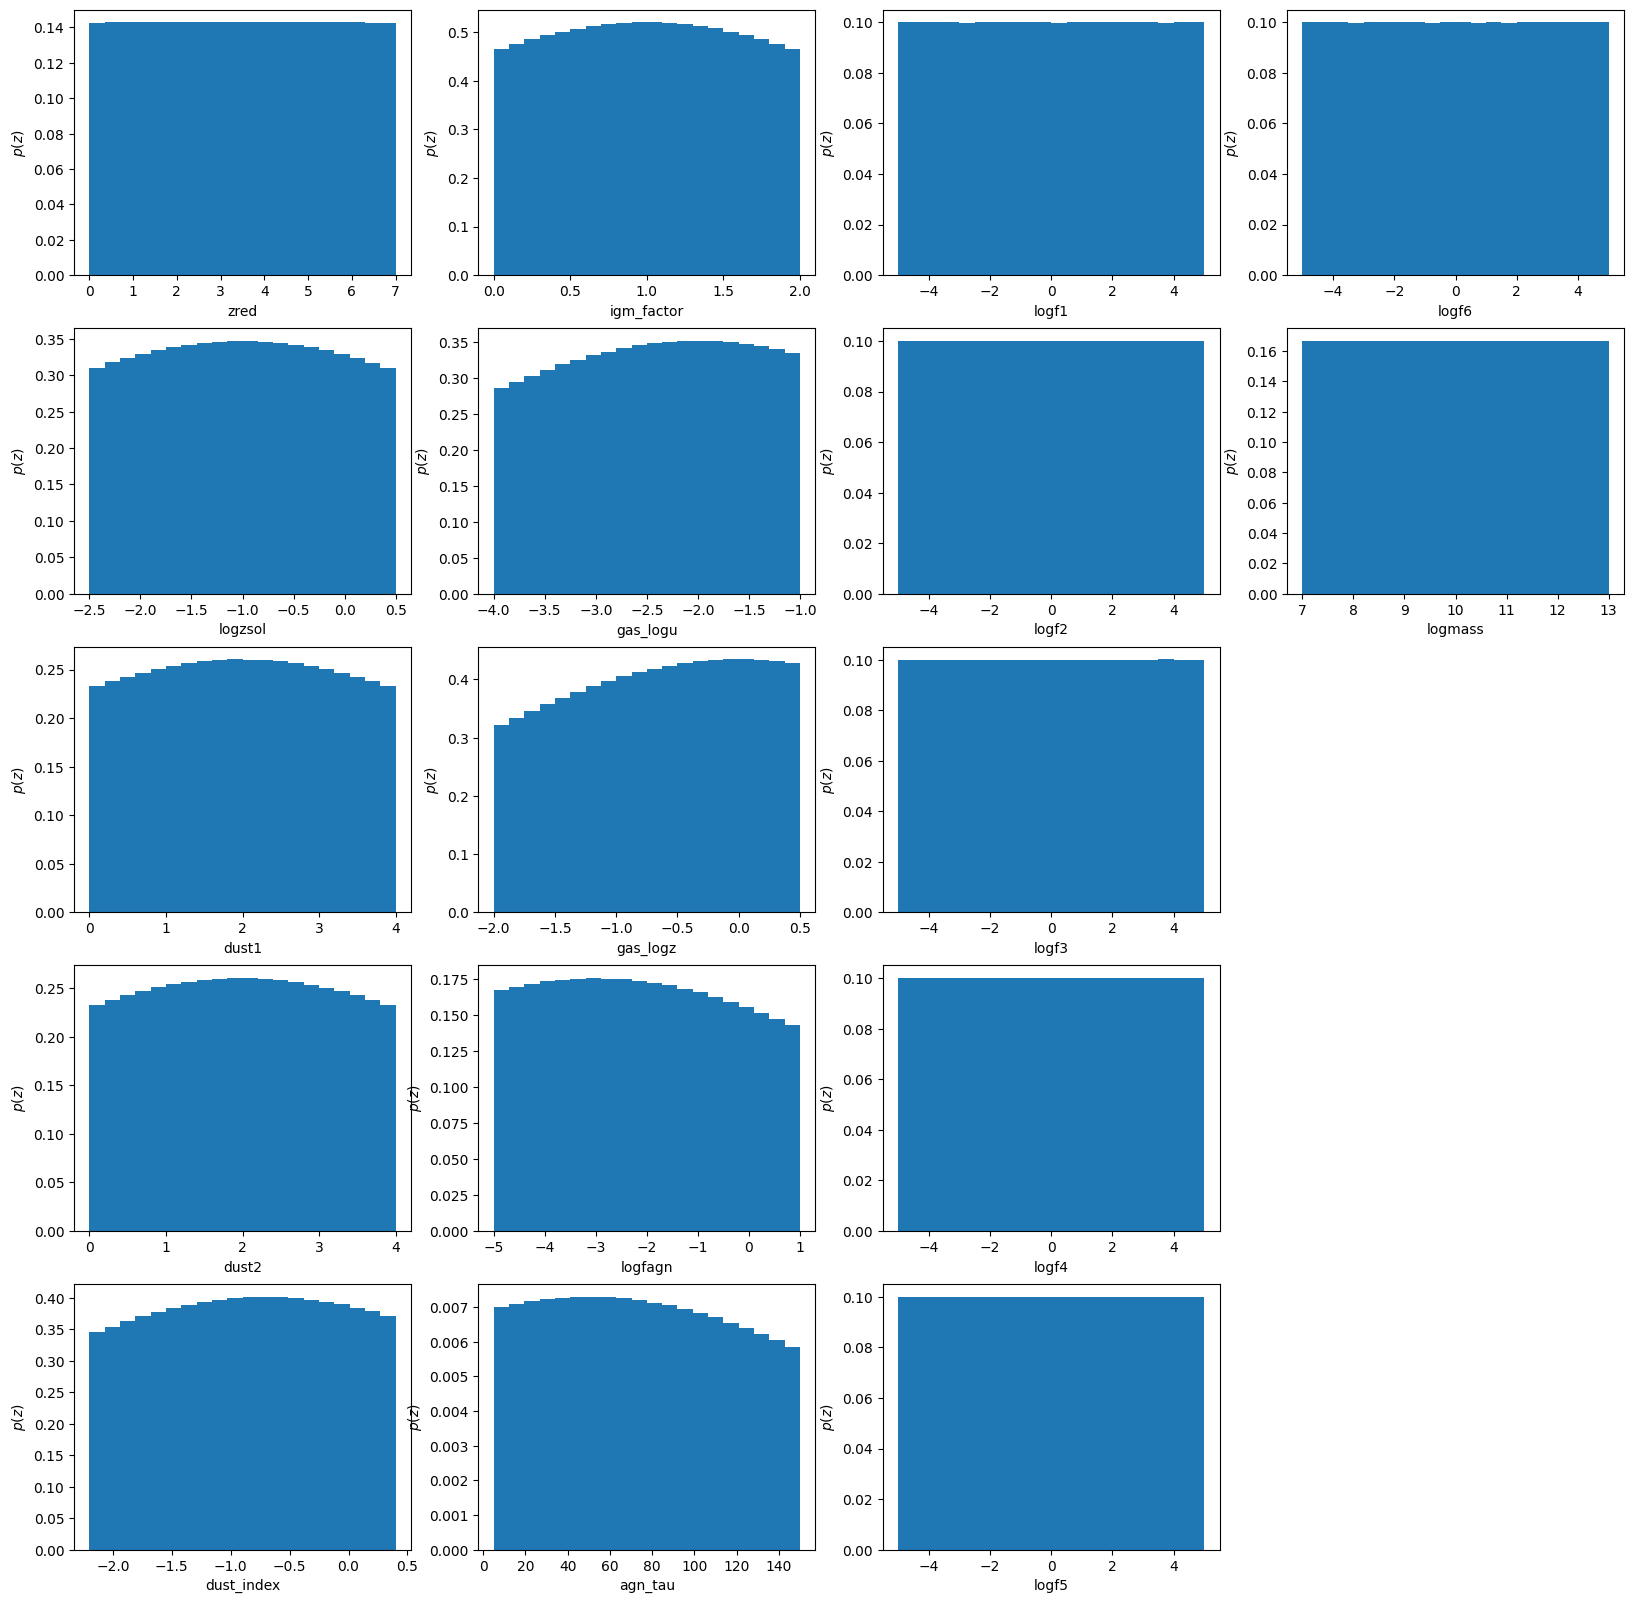

In [10]:
from lbg_forecast import population_model as pop
pop.plot_galaxy_population(sps_param_train)